<a href="https://colab.research.google.com/github/Sarthak-Sidhant/cow/blob/main/cd_model%20-%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME TO OUR MODEL

This is the cattle diseases recognition problem

We initially recognized three cow diseases, such as,
1. FMD(Foot and Mouth Disease)
2. LSD(Lumpy Skin Disease)
3. Kerato-conjunctivitis

In [ ]:

import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils.vis_utils import plot_model


import os
for dirname, _, filenames in os.walk('D:\Cattle_Diseases'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



D:\Cattle_Diseases\test\FMD\FMD1.jpg
D:\Cattle_Diseases\test\FMD\FMD25.jpg
D:\Cattle_Diseases\test\FMD\FMD28.jpg
D:\Cattle_Diseases\test\FMD\FMD32.jpg
D:\Cattle_Diseases\test\FMD\FMD37.jpg
D:\Cattle_Diseases\test\FMD\FMD39.jpg
D:\Cattle_Diseases\test\FMD\FMD40.jpg
D:\Cattle_Diseases\test\FMD\FMD41.jpg
D:\Cattle_Diseases\test\FMD\FMD6.jpg
D:\Cattle_Diseases\test\FMD\FMD9.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1007.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1023.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1052.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1073.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1094.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1107.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1147.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1221.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1222.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1244.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1277.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1287.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1365.jpg
D:\Cattle_Diseases\test\FMD\FMD_0_1374.jpg
D:\Cattle_Diseases\te

In [ ]:
train_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
val_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory("D:\\Cattle_Diseases\\train",target_size=(32,32))
val_generator = val_datagen.flow_from_directory("D:\\Cattle_Diseases\\test",target_size=(32,32))

Found 5744 images belonging to 3 classes.
Found 1440 images belonging to 3 classes.


In [ ]:
class_names = train_generator.class_indices
class_names = {class_names[i]:i for i in class_names.keys()}
print(class_names)

{0: 'FMD', 1: 'KERATO-CONJUNCTIVITIS', 2: 'LSD'}


In [ ]:
train_imgs, labels = next(train_generator)
print(train_imgs.shape)

(32, 32, 32, 3)


Text(0.5, 0, 'FMD')

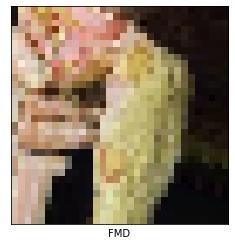

In [ ]:
plt.imshow(train_imgs[30])
plt.xticks([])
plt.yticks([])
plt.grid(False)
label1 = np.argmax(labels[30])
plt.xlabel(class_names.get(label1))

Text(0.5, 0, 'KERATO-CONJUNCTIVITIS')

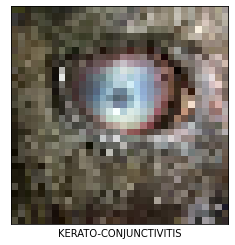

In [ ]:
plt.imshow(train_imgs[25])
plt.xticks([])
plt.yticks([])
plt.grid(False)
label1 = np.argmax(labels[25])
plt.xlabel(class_names.get(label1))

Text(0.5, 0, 'FMD')

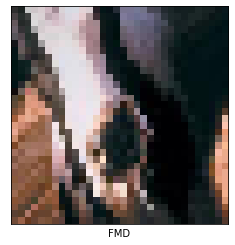

In [ ]:
plt.imshow(train_imgs[15])
plt.xticks([])
plt.yticks([])
plt.grid(True)
label1 = np.argmax(labels[15])
plt.xlabel(class_names.get(label1))

Text(0.5, 0, 'LSD')

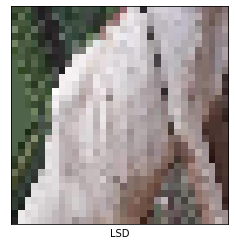

In [ ]:
plt.imshow(train_imgs[13])
plt.xticks([])
plt.yticks([])
plt.grid(True)
label1 = np.argmax(labels[13])
plt.xlabel(class_names.get(label1))

Text(0.5, 0, 'LSD')

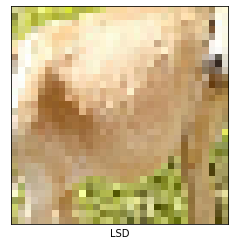

In [ ]:
plt.imshow(train_imgs[29])
plt.xticks([])
plt.yticks([])
plt.grid(False)
label2 = np.argmax(labels[29])
plt.xlabel(class_names.get(label2))

Text(0.5, 0, 'KERATO-CONJUNCTIVITIS')

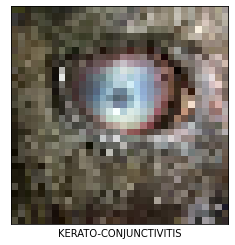

In [ ]:
plt.imshow(train_imgs[25])
plt.xticks([])
plt.yticks([])
plt.grid(False)
label0 = np.argmax(labels[25])
plt.xlabel(class_names.get(label0))

Text(0.5, 0, 'KERATO-CONJUNCTIVITIS')

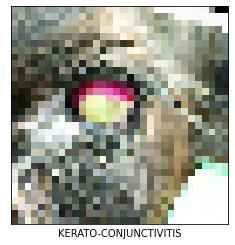

In [ ]:
plt.imshow(train_imgs[3])
plt.xticks([])
plt.yticks([])
plt.grid(False)
label1 = np.argmax(labels[3])
plt.xlabel(class_names.get(label1))

Text(0.5, 0, 'FMD')

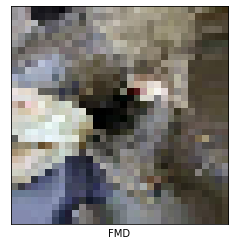

In [ ]:
plt.imshow(train_imgs[27])
plt.xticks([])
plt.yticks([])
plt.grid(False)
label1 = np.argmax(labels[27])
plt.xlabel(class_names.get(label1))

Text(0.5, 0, 'KERATO-CONJUNCTIVITIS')

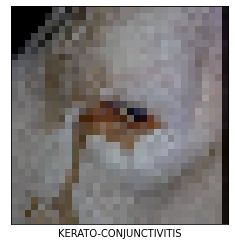

In [ ]:
plt.imshow(train_imgs[10])
plt.xticks([])
plt.yticks([])
plt.grid(False)
label1 = np.argmax(labels[10])
plt.xlabel(class_names.get(label1))

Text(0.5, 0, 'FMD')

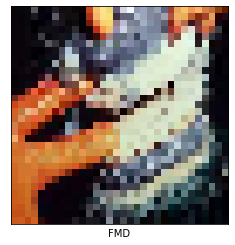

In [ ]:
plt.imshow(train_imgs[5])
plt.xticks([])
plt.yticks([])
plt.grid(False)
label1 = np.argmax(labels[5])
plt.xlabel(class_names.get(label1))

Text(0.5, 0, 'LSD')

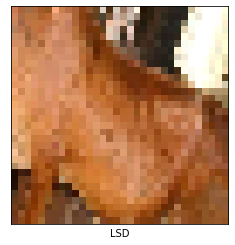

In [ ]:
plt.imshow(train_imgs[11])
plt.xticks([])
plt.yticks([])
plt.grid(False)
label1 = np.argmax(labels[11])
plt.xlabel(class_names.get(label1))

Text(0.5, 0, 'FMD')

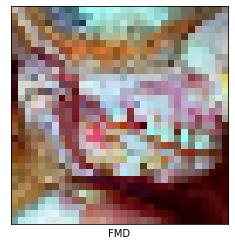

In [ ]:
plt.imshow(train_imgs[6])
plt.xticks([])
plt.yticks([])
plt.grid(False)
label2 = np.argmax(labels[6])
plt.xlabel(class_names.get(label2))

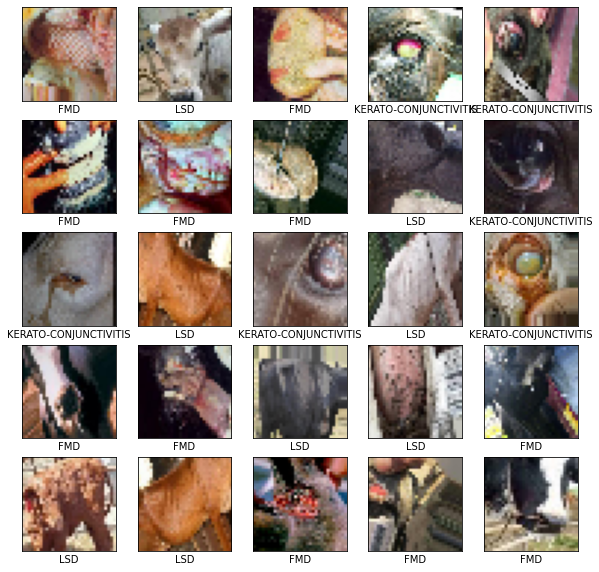

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    label1 = np.argmax(labels[i])
    plt.xlabel(class_names.get(label1))
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(filters= 16, kernel_size=(3,3), padding = 'same', activation = 'relu' , input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 32)         

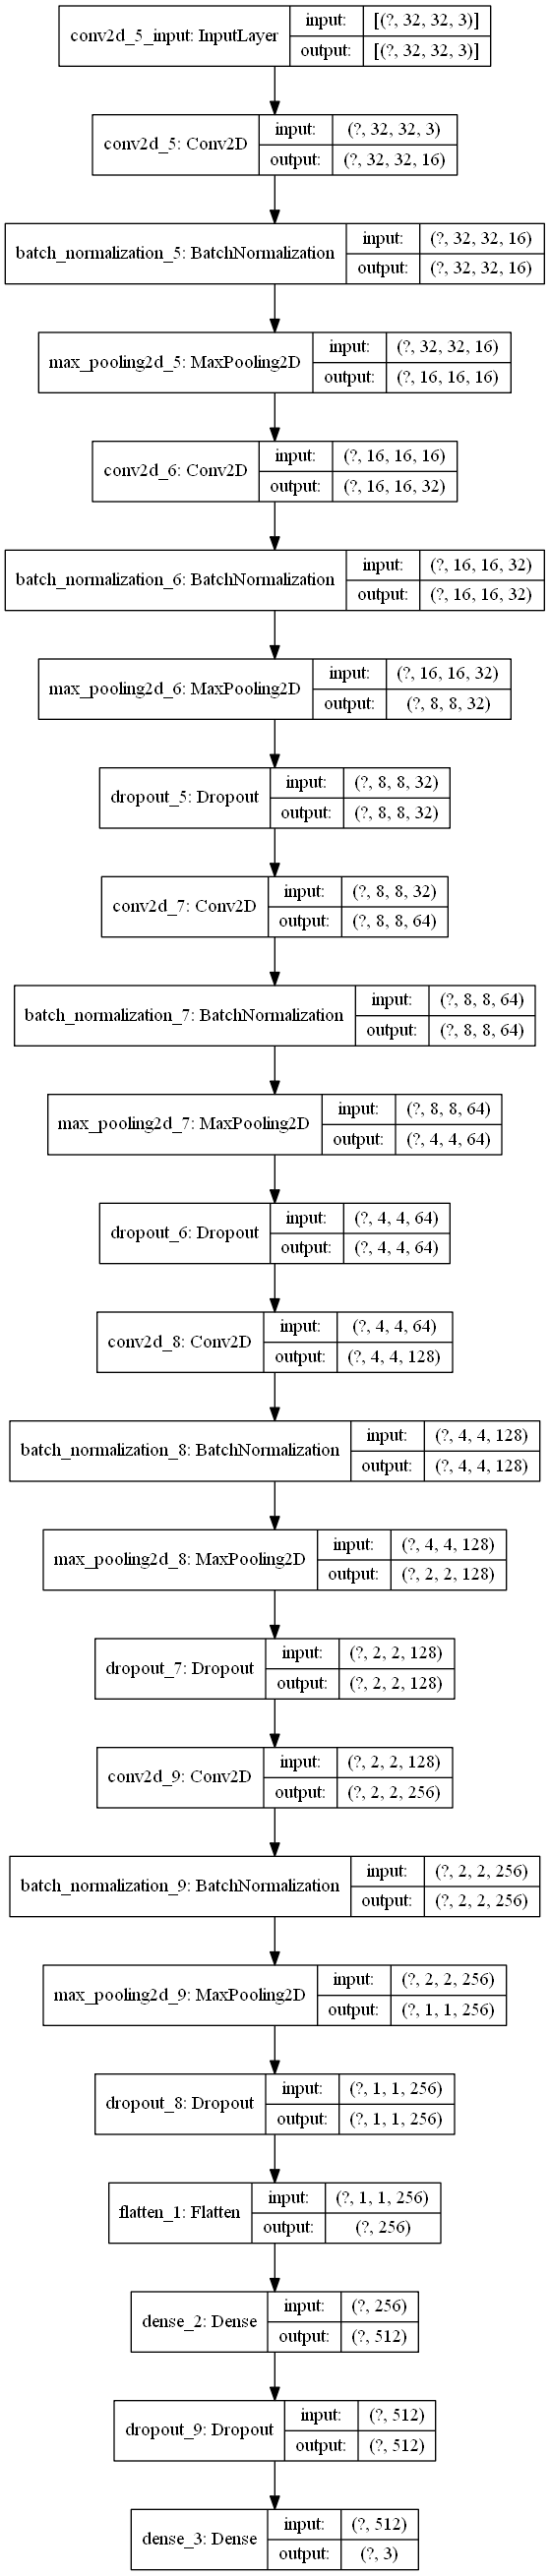

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator, steps_per_epoch=5744//32, epochs=32,
                              validation_data=val_generator, validation_steps = 1440//32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/32
179/179 [==============================] - 104s 579ms/step - loss: 0.8381 - accuracy: 0.6539 - val_loss: 2.7845 - val_accuracy: 0.3139
Epoch 2/32
179/179 [==============================] - 32s 177ms/step - loss: 0.3894 - accuracy: 0.8414 - val_loss: 3.4527 - val_accuracy: 0.3208
Epoch 3/32
179/179 [==============================] - 46s 258ms/step - loss: 0.2582 - accuracy: 0.9032 - val_loss: 0.9748 - val_accuracy: 0.7167
Epoch 4/32
179/179 [==============================] - 40s 225ms/step - loss: 0.1939 - accuracy: 0.9303 - val_loss: 1.0021 - val_accuracy: 0.7174
Epoch 5/32
179/179 [==============================] - 36s 204ms/step - loss: 0.1519 - accuracy: 0.9440 - val_loss: 0.3112 - val_accuracy: 0.8917
Epoch 6/32
179/179 [==============================] - 39s 220ms/step - loss: 0.1120 - accuracy: 0.9610 - val_loss: 0.3163 - val_accuracy: 0.9076
Epoch 7/32
179/179 [==============================] -

In [ ]:
model_history = history.history
loss_accuracy_train = model.evaluate(train_generator)
print("Training Loss: {:.4f}".format(loss_accuracy_train[0]))
print("Training Accuracy: {:.2%}".format(loss_accuracy_train[1]))
loss_accuracy = model.evaluate(val_generator)
print("Test Loss: {:.4f}".format(loss_accuracy[0]))
print("Testing Accuracy: {:.2%}".format(loss_accuracy[1]))

180/180 [==============================] - 18s 100ms/step - loss: 0.0024 - accuracy: 0.9995
Training Loss: 0.0024
Training Accuracy: 99.95%
45/45 [==============================] - 4s 97ms/step - loss: 0.2032 - accuracy: 0.9493
Test Loss: 0.2032
Testing Accuracy: 94.93%


In [ ]:
test_imgs, test_labels = next(val_generator)
predictions = model.predict(test_imgs)

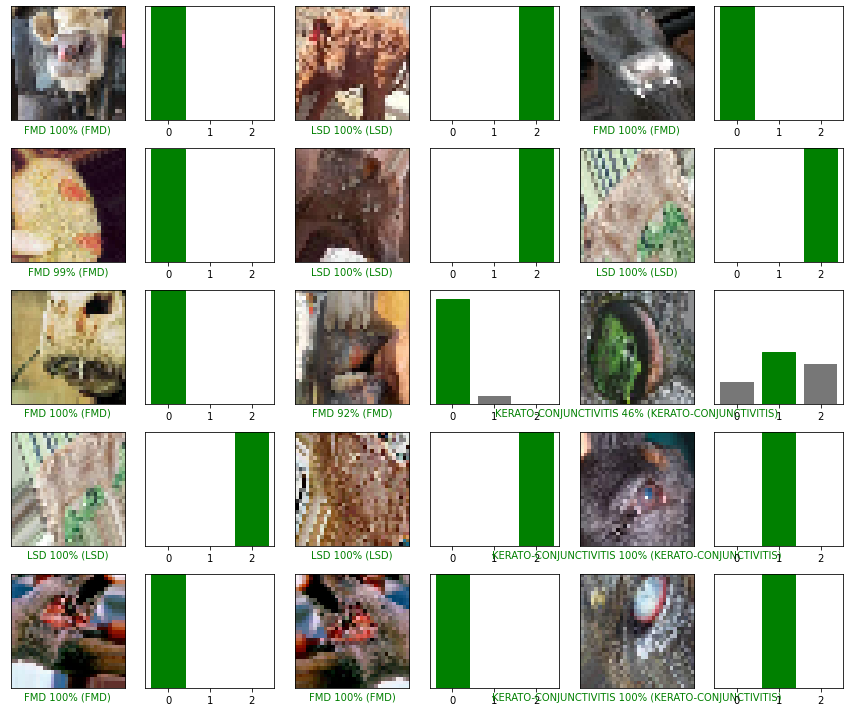

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label1 = np.argmax(true_label)
    if predicted_label == true_label1:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label1]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    true_label1 = np.argmax(true_label)
    plt.grid(False)
    plt.xticks(range(3))
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label1].set_color('green')
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


conv2d_5 (3, 3, 3, 16)
16


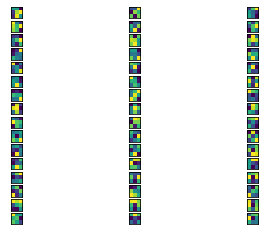

conv2d_6 (3, 3, 3, 16)
32


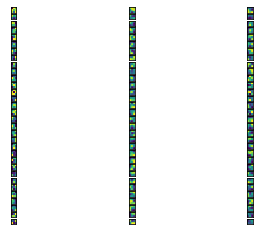

conv2d_7 (3, 3, 16, 32)
64


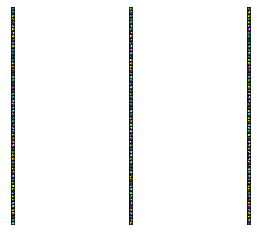

conv2d_8 (3, 3, 32, 64)
128


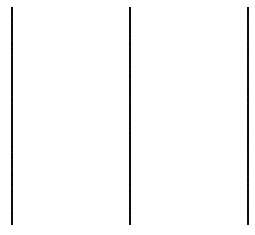

conv2d_9 (3, 3, 64, 128)
256


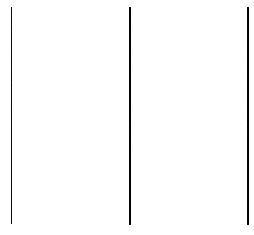

In [ ]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)

        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)
        print(filters.shape[3])
        filter_cnt=1

        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:,i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:,j])
                filter_cnt+=1
        plt.show()

(1, 32, 32, 16)
(1, 16, 16, 16)
(1, 16, 16, 32)
(1, 16, 16, 32)
(1, 8, 8, 32)
(1, 8, 8, 32)
(1, 8, 8, 64)
(1, 8, 8, 64)


<ipython-input-104-b53d2f207b87>:36: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()
<ipython-input-104-b53d2f207b87>:36: RuntimeWarning: divide by zero encountered in true_divide
  x /= x.std ()


(1, 4, 4, 64)
(1, 4, 4, 64)
(1, 4, 4, 128)
(1, 4, 4, 128)
(1, 2, 2, 128)
(1, 2, 2, 128)
(1, 2, 2, 256)
(1, 2, 2, 256)
(1, 1, 1, 256)
(1, 1, 1, 256)
(1, 256)
(1, 512)
(1, 512)
(1, 3)


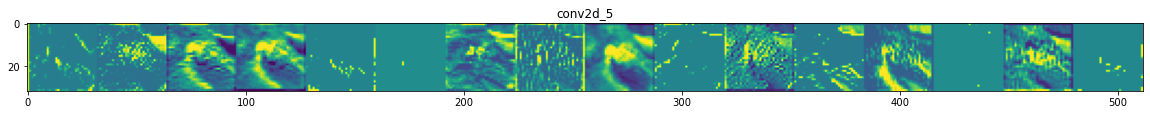

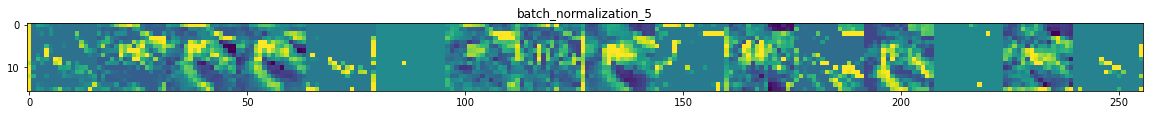

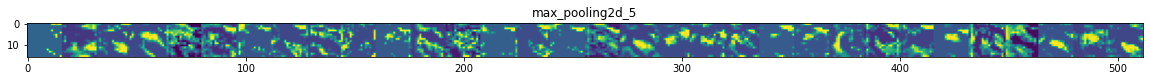

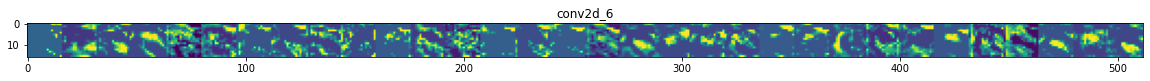

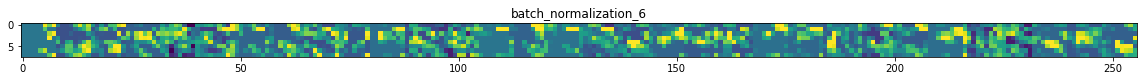

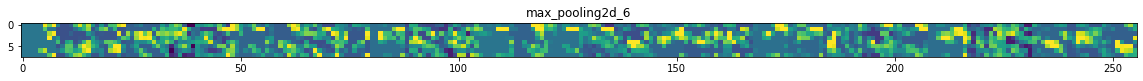

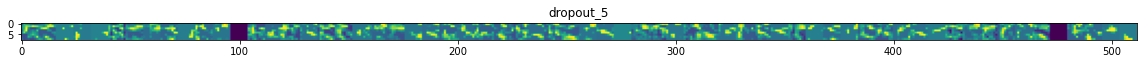

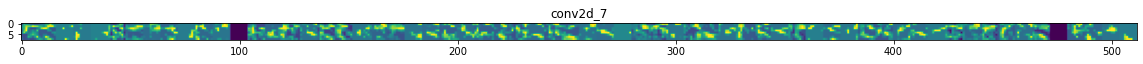

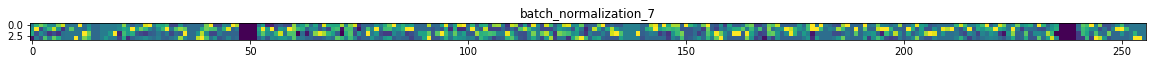

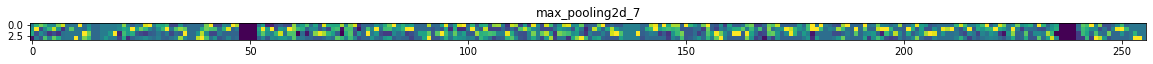

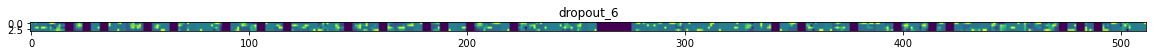

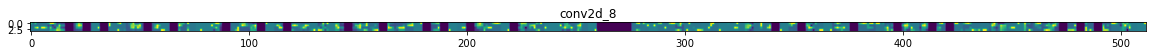

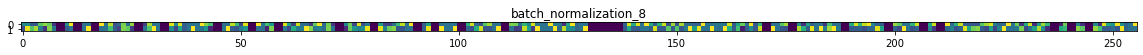

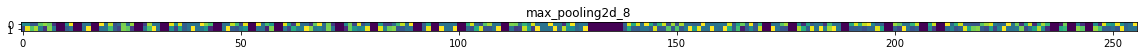

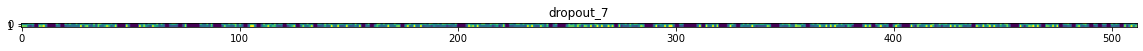

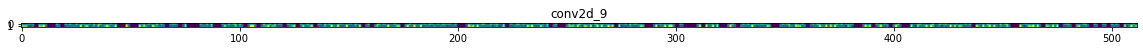

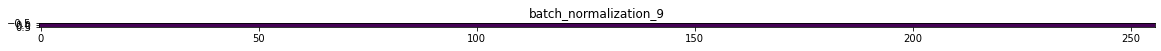

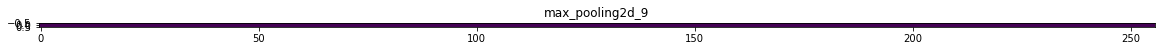

In [ ]:
img_path='D:\\Cattle_Diseases\\test\\FMD\\FMD_0_1538.jpg' #fmd
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32,32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

(1, 32, 32, 16)
(1, 16, 16, 16)
(1, 16, 16, 32)
(1, 16, 16, 32)
(1, 8, 8, 32)
(1, 8, 8, 32)
(1, 8, 8, 64)
(1, 8, 8, 64)
(1, 4, 4, 64)


<ipython-input-105-ec7f44c768ea>:36: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()
<ipython-input-105-ec7f44c768ea>:36: RuntimeWarning: divide by zero encountered in true_divide
  x /= x.std ()


(1, 4, 4, 64)
(1, 4, 4, 128)
(1, 4, 4, 128)
(1, 2, 2, 128)
(1, 2, 2, 128)
(1, 2, 2, 256)
(1, 2, 2, 256)
(1, 1, 1, 256)
(1, 1, 1, 256)
(1, 256)
(1, 512)
(1, 512)
(1, 3)


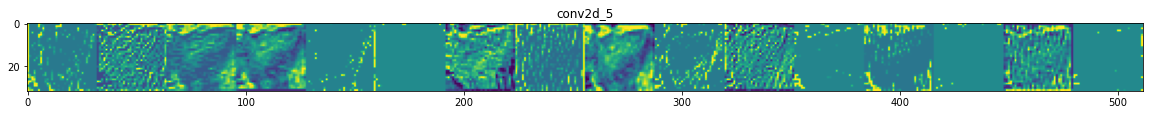

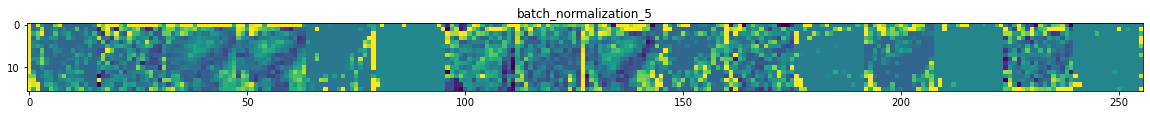

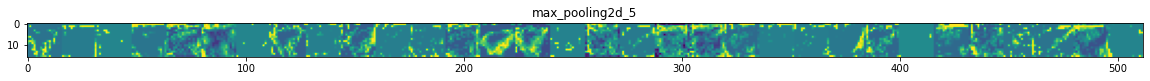

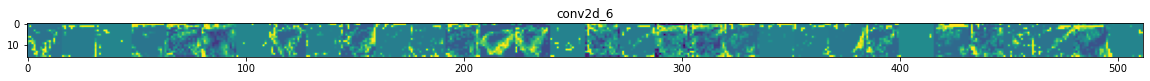

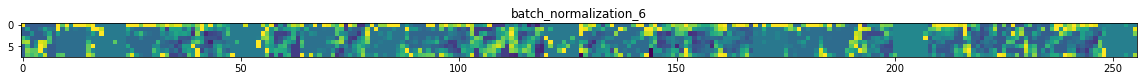

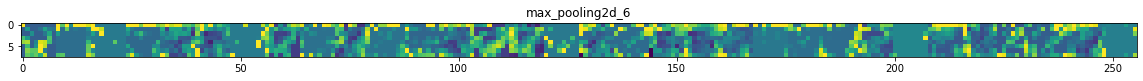

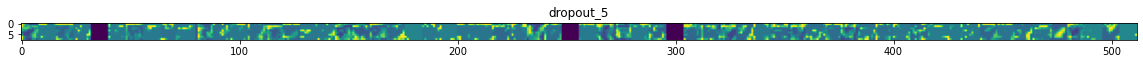

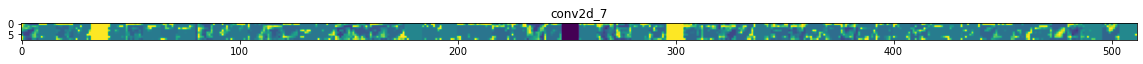

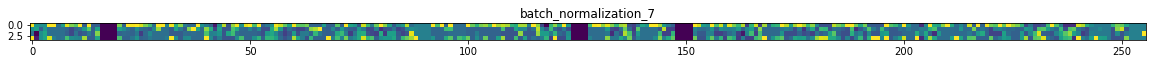

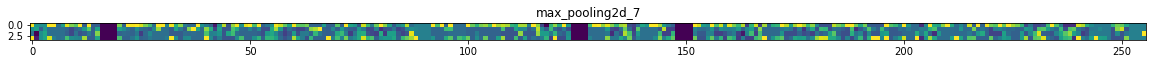

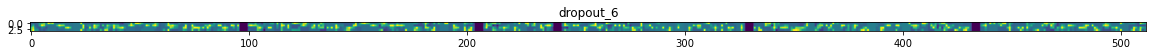

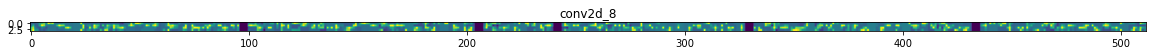

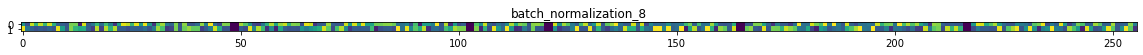

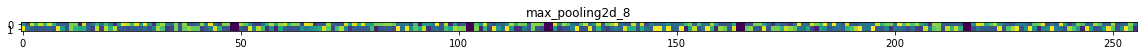

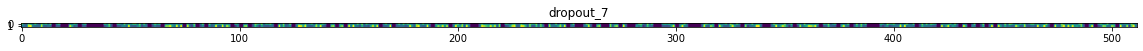

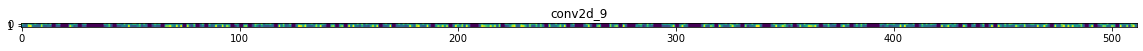

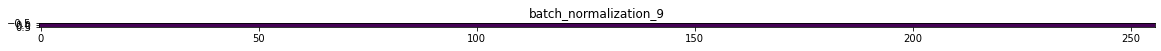

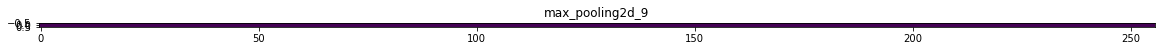

In [ ]:
img_path='D:\\Cattle_Diseases\\test\\LSD\\LSD_0_3012.jpg' #LSD
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32,32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

(1, 32, 32, 16)
(1, 16, 16, 16)
(1, 16, 16, 32)
(1, 16, 16, 32)
(1, 8, 8, 32)
(1, 8, 8, 32)
(1, 8, 8, 64)
(1, 8, 8, 64)
(1, 4, 4, 64)
(1, 4, 4, 64)
(1, 4, 4, 128)
(1, 4, 4, 128)


<ipython-input-106-1a0f9566572b>:36: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


(1, 2, 2, 128)
(1, 2, 2, 128)
(1, 2, 2, 256)
(1, 2, 2, 256)
(1, 1, 1, 256)
(1, 1, 1, 256)
(1, 256)
(1, 512)
(1, 512)
(1, 3)


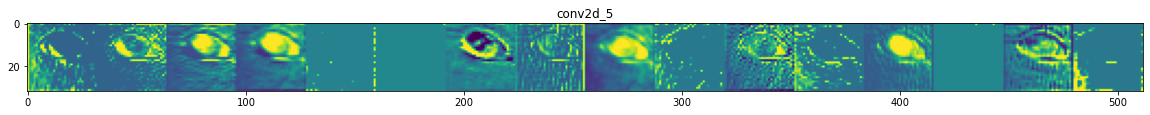

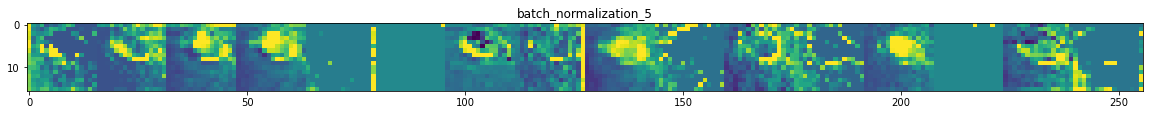

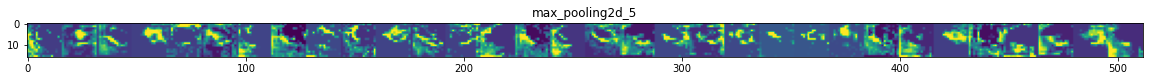

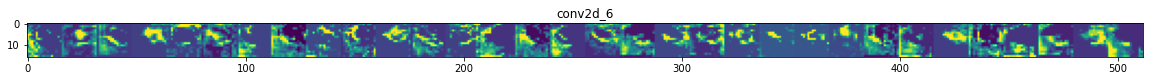

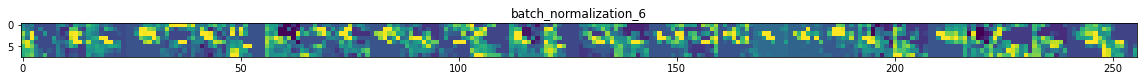

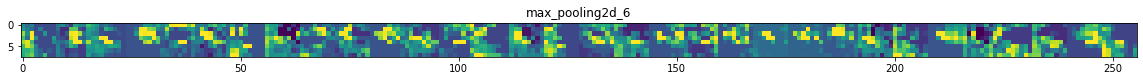

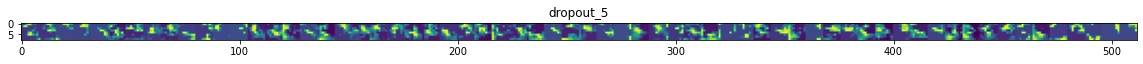

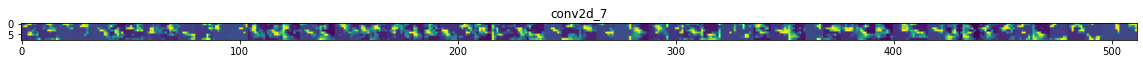

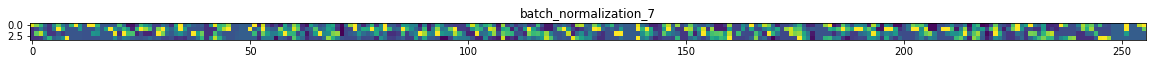

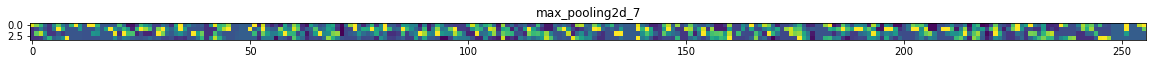

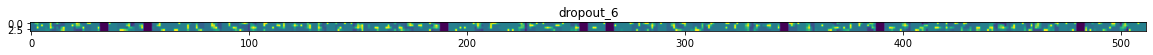

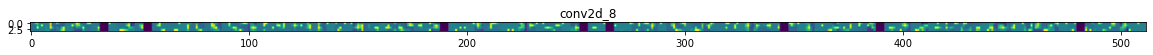

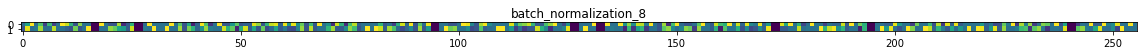

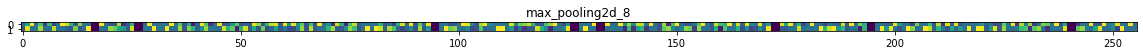

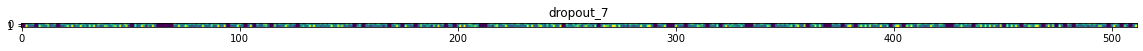

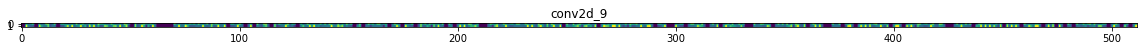

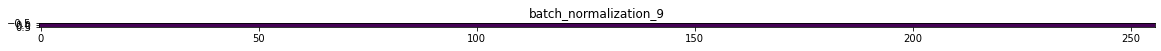

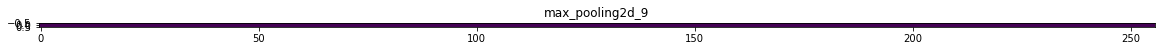

In [ ]:
img_path='D:\\Cattle_Diseases\\test\\KERATO-CONJUNCTIVITIS\\KERATO-CONJUNCTIVITIS_0_104.jpg' #KCJ
# Define a new Model, Input= image
# Output= intermediate representations for all layers in the
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(32,32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:

    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers

    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))

    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

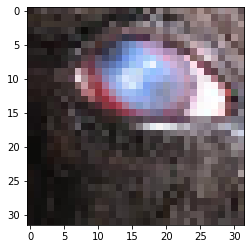

In [ ]:
img = load_img("D:\\Cattle_Diseases\\test\\KERATO-CONJUNCTIVITIS\\KERATO-CONJUNCTIVITIS_0_104.jpg", target_size=(32,32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
# Rescale by 1/255
x /= 255.0
plt.imshow(x)

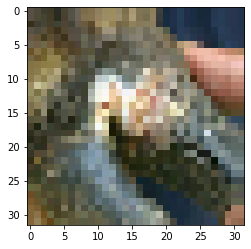

In [ ]:
img = load_img("D:\\Cattle_Diseases\\test\\FMD\\FMD_0_1538.jpg", target_size=(32,32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
# Rescale by 1/255
x /= 255.0
plt.imshow(x)

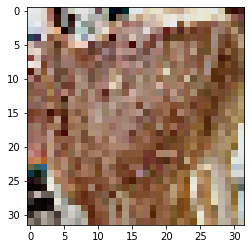

In [ ]:
img = load_img('D:\\Cattle_Diseases\\test\\LSD\\LSD_0_3012.jpg', target_size=(32,32))
# Convert ht image to Array of dimension (32,32,3)
x   = img_to_array(img)
# Rescale by 1/255
x /= 255.0
plt.imshow(x)